# Package Installation

In [2]:
!pip install pandas tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy==1.26.4


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import cv2
import random
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# MediaPipe Keypoint

In [8]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [11]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [26]:
def draw_landmarks(iamge, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [37]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_landmarks(image, results)
        
        cv2.imshow('Camera', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [23]:
frame

array([[[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [191, 195, 180],
        [190, 193, 180],
        [190, 194, 182]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [191, 195, 181],
        [190, 195, 181],
        [190, 195, 183]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [192, 196, 181],
        [190, 196, 181],
        [189, 197, 181]],

       ...,

       [[155, 136, 116],
        [159, 140, 118],
        [154, 137, 111],
        ...,
        [ 82, 135, 148],
        [ 81, 135, 148],
        [ 81, 138, 150]],

       [[149, 132, 105],
        [150, 134, 105],
        [147, 131, 102],
        ...,
        [ 79, 130, 149],
        [ 79, 131, 150],
        [ 79, 134, 152]],

       [[143, 129,  95],
        [140, 125,  92],
        [137, 122,  91],
        ...,
        [ 77, 127, 150],
        [ 76, 127, 150],
        [ 77, 130, 153]]

In [38]:
draw_landmarks(frame, results)

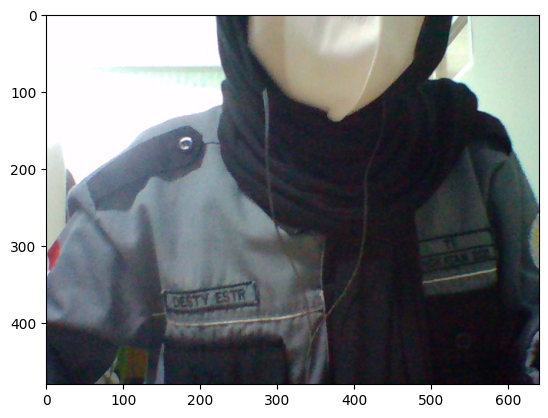

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Keypoint Extraction

In [41]:
results.pose_landmarks

landmark {
  x: 0.575934052
  y: 0.194183215
  z: -1.56300569
  visibility: 0.995255291
}
landmark {
  x: 0.632092953
  y: 0.0720277578
  z: -1.54777992
  visibility: 0.993240118
}
landmark {
  x: 0.660721719
  y: 0.0765979588
  z: -1.54753804
  visibility: 0.992823422
}
landmark {
  x: 0.688579381
  y: 0.0802293569
  z: -1.54814696
  visibility: 0.992736518
}
landmark {
  x: 0.536422968
  y: 0.0361054316
  z: -1.55523276
  visibility: 0.994029939
}
landmark {
  x: 0.501033723
  y: 0.0191289373
  z: -1.55432153
  visibility: 0.99336791
}
landmark {
  x: 0.463104248
  y: -0.00165753067
  z: -1.55488181
  visibility: 0.993616581
}
landmark {
  x: 0.732848763
  y: 0.0447300225
  z: -1.04269814
  visibility: 0.99334842
}
landmark {
  x: 0.42664513
  y: -0.0464188419
  z: -1.04070091
  visibility: 0.995414555
}
landmark {
  x: 0.606265187
  y: 0.263967216
  z: -1.3400203
  visibility: 0.998412
}
landmark {
  x: 0.510654569
  y: 0.252639741
  z: -1.34135044
  visibility: 0.998637259
}
landma

In [42]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [43]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [46]:
extract_keypoints(results)

array([ 0.57593405,  0.19418322, -1.56300569, ...,  0.        ,
        0.        ,  0.        ])

# Collection Folder

In [51]:
# data_path = os.path.join('Data_Collection')

# actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
#                    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
#                    'halo', 'terima_kasih', 'sampai_jumpa'])
# no_sequences = 30
# seq_length = 50

In [57]:
data_path = os.path.join('COBA')

actions = np.array(['A', 'B', 'C'])
no_sequences = 30
seq_length = 30

In [58]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

# Keypoints Extraction

In [59]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        for action in actions:
            for sequence in range(no_sequences):
                for frame_num in range(seq_length):
                    
                    ret, frame = cap.read()
                
                    image, results = mediapipe_detection(frame, holistic)
                    print(results)
            
                    draw_landmarks(image, results)

                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.waitKey(3000)
                    else:
                        cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) 
                        cv2.imshow('Camera', image)
                    
                    keypoint = extract_keypoints(results)
                    npy_path = os.path.join(data_path, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoint)
        
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
        cap.release()
        cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [60]:
cap.release()
cv2.destroyAllWindows()

# Data Preprocessing

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [62]:
label_map = {label:num for num, label in enumerate(actions)}

In [63]:
label_map

{'A': 0, 'B': 1, 'C': 2}

In [64]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(seq_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [65]:
np.array(sequences).shape

(90, 30, 1662)

In [66]:
np.array(labels).shape

(90,)

In [67]:
X = np.array(sequences)

In [68]:
X.shape

(90, 30, 1662)

In [70]:
y = to_categorical(labels).astype(int)

In [71]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [80]:
y_test.shape

(5, 3)

# Model Build & Train

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [82]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [83]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [84]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - categorical_accuracy: 0.3190 - loss: 6.7546
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.4344 - loss: 15.8938
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 0.3503 - loss: 34.3072
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - categorical_accuracy: 0.3679 - loss: 31.0323
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - categorical_accuracy: 0.4931 - loss: 31.2569
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.2447 - loss: 165.8652
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - categorical_accuracy: 0.4051 - loss: 69.1094
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.3366 - loss: 70.8902
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.2505 - loss: 73.4595
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.3992 - loss: 43.7875
Epoch 11/2000
3/3 